#### Задание 1. 

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data, target, coef = datasets.make_regression(n_samples=10000, n_features = 4, n_informative = 4, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 3, bias=200)


In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

*Добавим столбец с единицами для вычисления интерсепта. В datasets.make_regression смещение добавил параметром bias=200*

In [4]:
data = np.hstack([np.ones((data.shape[0], 1)), data])

*Инициализируем функции градиентного спуска и стохастического градиентного спуска:*

In [5]:
def gradient_descent(X, y, iterations, alpha):
    
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    w_list = [W.copy()]
    errors = []
    n = X.shape[0]
    
    for i in range(iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)

        old_W = W.copy()
        W -= (alpha * (1/n * 2 * X.T @ (y_pred - y)))

        w_list.append(W.copy())
        errors.append(err)

        if i % 100 == 0:
            print(i, W, err)

        if np.linalg.norm(W - old_W, ord=2) < 1e-6:
            y_pred = np.dot(X, W)
            err = calc_mse(y, y_pred)
            errors.append(err)
            print(i, W, err)
            break
        
    w_list = np.array(w_list)
    
    return y_pred, W, w_list, errors

In [6]:
def sgd(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    w_list = [W.copy()]
    errors = []
    n = X.shape[0]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot(X_tmp.T, (y_pred_tmp - y_tmp))))
            
            w_list.append(W.copy())
            errors.append(err)

        if i % (iterations / 10) == 0:
            print(i, W, err)
        
        if i == iterations:
            y_pred_tmp = np.dot(X_tmp, W)
            errors.append(calc_mse(y_tmp, y_pred_tmp))
            print(i, W, err)
    
    w_list = np.array(w_list)
    
    return y_pred_tmp, W, w_list, errors

In [7]:
alpha = 1e-1
y_pred1, W1, w_list1, errors1 = gradient_descent(data, target, 10000, alpha)

0 [40.0350216  18.50140725 18.96427246 17.30939855 15.06988467] 69353.60113840198
82 [200.03113074  96.54516159  91.66689042  81.32911602  81.26953682] 24.87453566028393


In [8]:
y_pred2, W2, w_list2, errors2 = sgd(data, target, 100, alpha=1e-1)

10 [172.49776517  82.48201369  79.48323228  70.28812871  68.89872209] 2879.5356377683343
20 [196.22378702  94.4960892   90.03228139  79.79938002  79.41598545] 110.92678078737892
30 [199.50270718  96.2432182   91.44847691  81.11470641  80.99561252] 19.424593650868218
40 [199.95665764  96.49728531  91.63921702  81.2965318   81.23050563] 12.524845217384959
50 [200.01961089  96.53422808  91.66498934  81.32165077  81.26515862] 11.670031859608427
60 [200.02835512  96.53959896  91.66848264  81.32511796  81.27023823] 11.55163992319771
70 [200.02957153  96.54037966  91.6689576   81.32559602  81.27097895] 11.534974466835061
80 [200.02974099  96.54049311  91.66902237  81.32566185  81.27108649] 11.532625321575658
90 [200.02976463  96.5405096   91.66903123  81.3256709   81.27110205] 11.532294411830835
100 [200.02976793  96.54051199  91.66903245  81.32567214  81.2711043 ] 11.532247840440947
100 [200.02976793  96.54051199  91.66903245  81.32567214  81.2711043 ] 11.532247840440947


*Построим на одном графике функцию потерь для каждой итерации для каждого метода. Для метода градиентного спуска отмасштабируем количесво итераций так, чтобы на каждую итерацию градиентного спуска приходилась одна эпоха обучения SGD:*

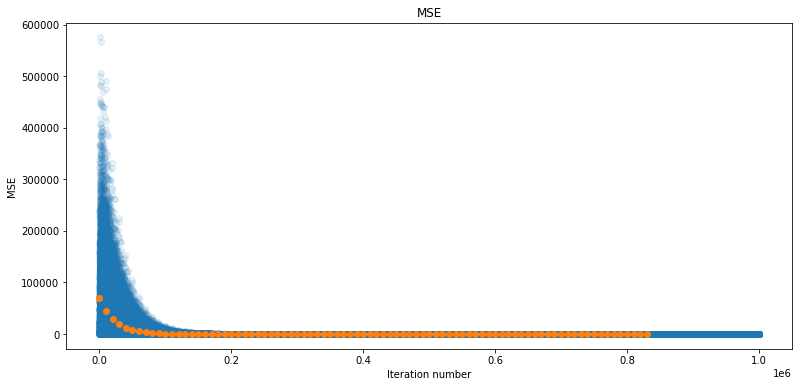

In [9]:
plt.figure(figsize=(13, 6))
plt.scatter(range(len(errors2)), errors2, alpha=0.1)
plt.scatter(np.arange(0,len(errors1)*data.shape[0],data.shape[0]), errors1)

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.show()

*По графику видим, что скорость сходимости градиентного спуска выше, чем скорость сходимости SGD. Но SGD применяется для очень больших датасетов, когда хранить его в памяти и производить с ним матричные операции становится очень затруднительно.*

*Теперь на графиках представим изменения коэффициентов линейной регрессии для обоих методов:*

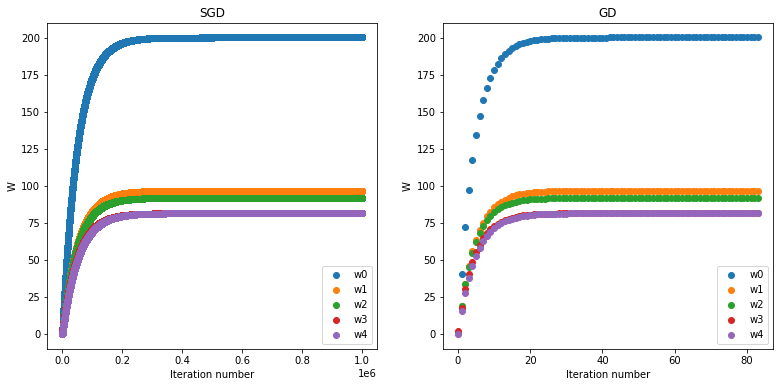

In [10]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
for itm in range(w_list2.shape[1]):
    label = 'w' + str(itm)
    plt.scatter(range(w_list2.shape[0]), w_list2[:, itm], label=label)
# plt.scatter(np.arange(0,len(errors1)*data.shape[0],data.shape[0]), errors1)
# plt.scatter(range(len(errors1)), errors1)

plt.title('SGD')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('W')

plt.subplot(122)
for itm in range(w_list1.shape[1]):
    label = 'w' + str(itm)
    plt.scatter(range(w_list1.shape[0]), w_list1[:, itm], label=label)
# plt.scatter(np.arange(0,len(errors1)*data.shape[0],data.shape[0]), errors1)
# plt.scatter(range(len(errors1)), errors1)

plt.title('GD')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('W')
plt.show()

*Видим, что оба метода сходятся к одинаковым значениям коэффициентов, затрачивая на это примерно одинаковое количество машинных итераций.*

#### Задание 2.

Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

*Инициализируем функцию стандартизации признаков:*

In [11]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

*Стандартизируем признаки (первый столбец с единицами не трогаем):*

In [12]:
data_st = data.copy()
for i in range(1, data.shape[1]):
    data_st[:, i] = calc_std_feat(data_st[:, i])

*Добавим в функции градиентного и стохастического градиентного спуска $L_{2}$-регуляризацию*

*Функция потерь в случае $L_{2}$-регуляризации будет:*

$$Q(w, X) + \lambda ||w||^{2}$$

*Тогда ее градиент будет вычисляться как:*

$$\frac{2}{l}X^{T}(Xw-y)+ 2\lambda w$$

In [13]:
def ridge_gradient_descent(X, y, iterations, lambda_, alpha):
    
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    w_list = [W.copy()]
    errors = []
    n = X.shape[0]
    
    for i in range(iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)

        old_W = W.copy()
        W -= (alpha * (1/n * 2 * X.T @ (y_pred - y) + 2 * lambda_ * W))

        w_list.append(W.copy())
        errors.append(err)

#         if i % 100 == 0:
#             print(i, W, err)

        if np.linalg.norm(W - old_W, ord=2) < 1e-6:
            y_pred = np.dot(X, W)
            err = calc_mse(y, y_pred)
            errors.append(err)
            print(i, W, err)
            break
        
    w_list = np.array(w_list)
    
    return y_pred, W, w_list, errors

In [14]:
def ridge_sgd(X, y, iterations, lambda_=1e-2, qty_in_batch=1, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    w_list = [W.copy()]
    errors = []
    n = X.shape[0]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            # print(b, n_batch, start_, end_)

            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot(X_tmp.T, (y_pred_tmp - y_tmp)) + 2 * lambda_ * W))
            
        w_list.append(W.copy())
        errors.append(err)

#         if i % (iterations / 10) == 0:
#             print(i, W, err)
        
        if i == iterations:
            y_pred_tmp = np.dot(X_tmp, W)
            errors.append(calc_mse(y_tmp, y_pred_tmp))
            print(i, W, err)
#             break
    
    w_list = np.array(w_list)
    
    return y_pred_tmp, W, w_list, errors

*Представим на графике среднеквадратичную ошибку для разных значений коэффициента регуляризации для градиентного спуска:*

81 [198.19308489  95.58470799  91.91348807  80.38546478  81.97048275] 24.87453566028253
79 [194.30694587  93.7165603   90.08990253  78.8370881   80.29768614] 51.89173136694838
77 [190.57027369  91.92008181  88.337307    77.34723436  78.69170344] 128.81283112055866
76 [186.97460849  90.19122369  86.65163365  75.91264733  77.14861536] 249.96506845681904
74 [183.51211554  88.52623586  85.02911884  74.53030749  75.66480183] 410.304454512363


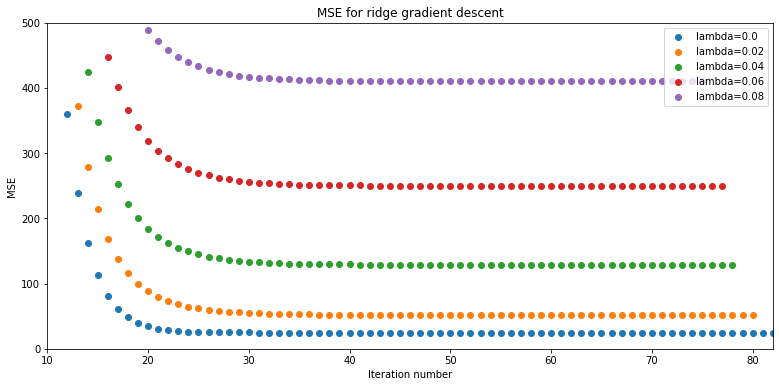

In [15]:
plt.figure(figsize=(13, 6))
for i in np.arange(0, 1e-1, 2e-2):
    _, _, _, errors3 = ridge_gradient_descent(data_st, target, 10000, i, alpha)
    plt.scatter(range(len(errors3)), errors3, label=f'lambda={i}')

plt.title('MSE for ridge gradient descent')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim([10, 82])
plt.ylim([0, 500])
plt.show()

*Видно, что при увеличении коэффициента регуляризации модель сильнее штрафует за большие веса, не давая приблизиться к истинному минимуму среднеквадратичной ошибки, из-за чего среднеквадратичная ошибка увеличивается.*

*На следующем графике представим убывание весов в зависимости от коэффициента регуляризации:*

81 [198.19308489  95.58470799  91.91348807  80.38546478  81.97048275] 24.87453566028253
79 [194.30694587  93.7165603   90.08990253  78.8370881   80.29768614] 51.89173136694838
77 [190.57027369  91.92008181  88.337307    77.34723436  78.69170344] 128.81283112055866
76 [186.97460849  90.19122369  86.65163365  75.91264733  77.14861536] 249.96506845681904
74 [183.51211554  88.52623586  85.02911884  74.53030749  75.66480183] 410.304454512363


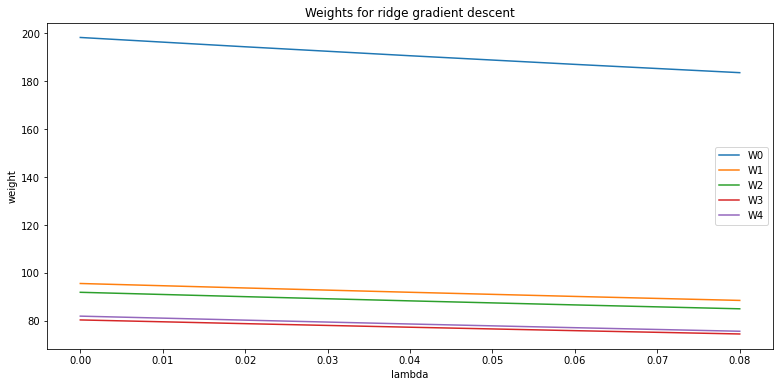

In [16]:
plt.figure(figsize=(13, 6))
weights = []
step = 2e-2
max_step = 1e-1
for i in np.arange(0, max_step, step):
    _, W3, _, _ = ridge_gradient_descent(data_st, target, 10000, i, alpha)
    weights.append(W3)
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(np.arange(0, weights.shape[1]*step, step), weights[:, i], label=f'W{i}')

plt.title('Weights for ridge gradient descent')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('weight')
# plt.xlim([10, 82])
# plt.ylim([0, 500])
plt.show()

*Теперь построим такие же графики для модели SGD. Для Ridge-SGD и Lasso-SGD я изменил функцию, записывая ошибку и вектор весов только после каждой эпохи обучения:*

20 [194.57112519  93.84402494  90.15735872  79.04207966  80.21826088] 100.94407425966988
20 [163.79456603  79.0329391   75.77628832  66.73619321  67.17797093] 4275.351647896183
20 [141.02620483  68.06824599  65.15957611  57.60710517  57.59580365] 11294.404969662011
20 [123.64139722  59.69126201  57.06785164  50.61905367  50.3232121 ] 18895.874826676085
20 [109.9966893   53.1132447   50.72672281  45.12219203  44.64514063] 26217.17952441688


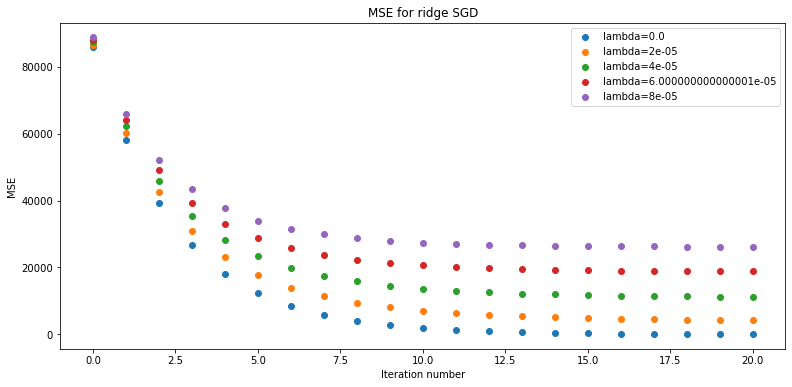

In [17]:
plt.figure(figsize=(13, 6))
for i in np.arange(0, 1e-4, 2e-5):
    _, _, _, errors4 = ridge_sgd(data_st, target, 20, lambda_=i, alpha=1e-1)
    plt.scatter(range(len(errors4)), errors4, label=f'lambda={i}')

plt.title('MSE for ridge SGD')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('MSE')
# plt.xlim([10, 82])
# plt.ylim([0, 500])
plt.show()

20 [194.57112519  93.84402494  90.15735872  79.04207966  80.21826088] 100.94407425966988
20 [163.79456603  79.0329391   75.77628832  66.73619321  67.17797093] 4275.351647896183
20 [141.02620483  68.06824599  65.15957611  57.60710517  57.59580365] 11294.404969662011
20 [123.64139722  59.69126201  57.06785164  50.61905367  50.3232121 ] 18895.874826676085
20 [109.9966893   53.1132447   50.72672281  45.12219203  44.64514063] 26217.17952441688


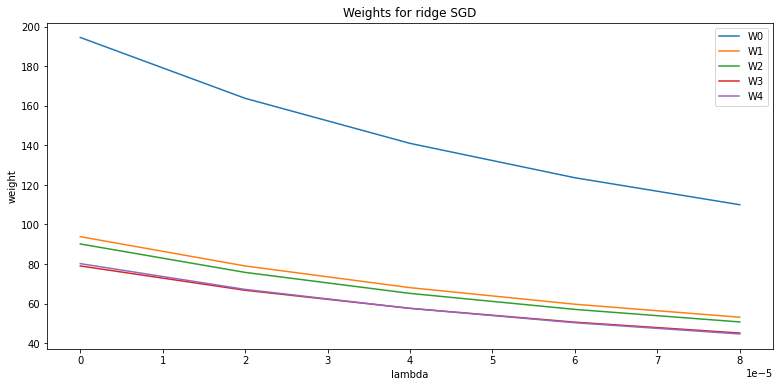

In [18]:
plt.figure(figsize=(13, 6))
weights = []
step = 2e-5
max_step = 1e-4
for i in np.arange(0, max_step, step):
    _, W4, _, _ = ridge_sgd(data_st, target, 20, lambda_=i, alpha=1e-1)
    weights.append(W4)
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(np.arange(0, weights.shape[1]*step, step), weights[:, i], label=f'W{i}')

plt.title('Weights for ridge SGD')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('weight')
# plt.xlim([10, 82])
# plt.ylim([0, 500])
plt.show()

*По графикам видно, что SGD-модель регуляризация штрафует намного сильнее, чем модель классического градиентного спуска - коэффициенты регуляризации пришлось сделать на несколько порядков ниже, чтоб не занулялись веса. Происходит это из-за нестабильности SGD-модели*

#### Задание 3.

Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

*Основная проблема L1-регуляризации, что в нуле она не дифференциируется. Однако производную L1-регуляризатора в нуле мы можем приравнять нулю. Тогда производной L1-регуляризатора будет:*

$$\lambda Sign(w)$$

In [19]:
def lasso_gradient_descent(X, y, iterations, lambda_, alpha):
    
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    w_list = [W.copy()]
    errors = []
    n = X.shape[0]
    
    for i in range(iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)

        old_W = W.copy()
        W -= (alpha * (1/n * 2 * X.T @ (y_pred - y) + lambda_ * np.sign(W)))

        w_list.append(W.copy())
        errors.append(err)

#         if i % 100 == 0:
#             print(i, W, err)

        if np.linalg.norm(W - old_W, ord=2) < 1e-6:
            y_pred = np.dot(X, W)
            err = calc_mse(y, y_pred)
            errors.append(err)
            print(i, W, err)
            break
        
    w_list = np.array(w_list)
    
    return y_pred, W, w_list, errors

In [20]:
def lasso_sgd(X, y, iterations, lambda_=1e-2, qty_in_batch=1, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    w_list = [W.copy()]
    errors = []
    n = X.shape[0]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            # print(b, n_batch, start_, end_)

            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot(X_tmp.T, (y_pred_tmp - y_tmp)) + lambda_ * np.sign(W)))
            
        w_list.append(W.copy())
        errors.append(err)

#         if i % (iterations / 10) == 0:
#             print(i, W, err)
        
        if i == iterations:
            y_pred_tmp = np.dot(X_tmp, W)
            errors.append(calc_mse(y_tmp, y_pred_tmp))
            print(i, W, err)
#             break
    
    w_list = np.array(w_list)
    
    return y_pred_tmp, W, w_list, errors

*Представим на графиках среднеквадратичную ошибку и изменение весов в зависимости коэффициента регуляризации для классического градиентного спуска:*

81 [198.19308489  95.58470799  91.91348807  80.38546478  81.97048275] 24.87453566028253
80 [188.19308447  85.6283245   81.78081343  70.5263671   71.59333507] 528.1277252523033
80 [178.19308461  75.6719413   71.64813913  60.66726958  61.21618782] 2037.886936269923
79 [168.19308416  65.71555792  61.51546457  50.80817194  50.8390403 ] 4554.15225444818
79 [158.19308434  55.75917478  51.38279033  40.94907444  40.46189314] 8076.923516085922


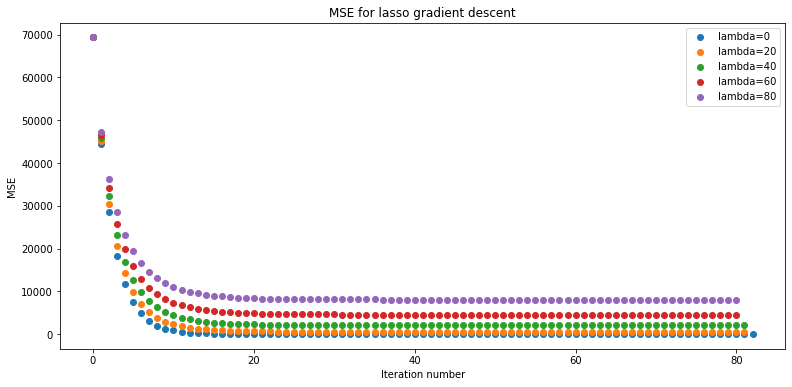

In [21]:
plt.figure(figsize=(13, 6))
for i in np.arange(0, 100, 20):
    _, _, _, errors5 = lasso_gradient_descent(data_st, target, 10000, i, alpha)
    plt.scatter(range(len(errors5)), errors5, label=f'lambda={i}')

plt.title('MSE for lasso gradient descent')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('MSE')
# plt.xlim([10, 82])
# plt.ylim([0, 500])
plt.show()

81 [198.19308489  95.58470799  91.91348807  80.38546478  81.97048275] 24.87453566028253
80 [178.19308461  75.6719413   71.64813913  60.66726958  61.21618782] 2037.886936269923
79 [158.19308434  55.75917478  51.38279033  40.94907444  40.46189314] 8076.923516085922
77 [138.19308332  35.84640849  31.11744158  21.23087929  19.70759878] 18141.984291208108


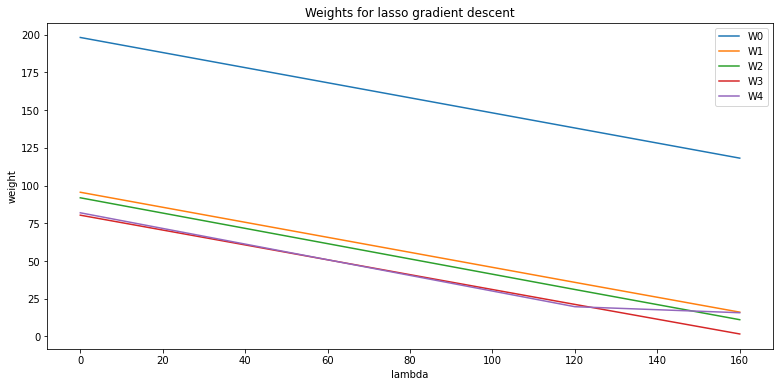

In [22]:
plt.figure(figsize=(13, 6))
weights = []
step = 40
max_step = 200
for i in np.arange(0, max_step, step):
    _, W5, _, _ = lasso_gradient_descent(data_st, target, 10000, i, alpha)
    weights.append(W5)
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(np.arange(0, weights.shape[1]*step, step), weights[:, i], label=f'W{i}')

plt.title('Weights for lasso gradient descent')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('weight')
# plt.xlim([10, 82])
# plt.ylim([0, 500])
plt.show()

*Видим, что L1-регуляризация резко зануляет веса, в то время как L2-регуляризация из уменьшает плавно.*

*Теперь построим такие же графики для SGD:*

20 [194.57112519  93.84402494  90.15735872  79.04207966  80.21826088] 100.94407425966988
20 [145.45198278  44.92685715  40.48073575  30.73378349  29.46013782] 25557.90511460805
20 [9.63426262e+01 4.10426759e-02 3.24209449e-02 4.53607982e-02
 1.61873136e-02] 68780.95414295353
20 [ 4.72574121e+01  1.05618694e-02 -4.38058550e-04  3.99574753e-02
  1.28431245e-02] 96932.41419367761
20 [ 0.04704063  0.00572166 -0.00321651  0.03702685  0.013618  ] 128567.33849456118


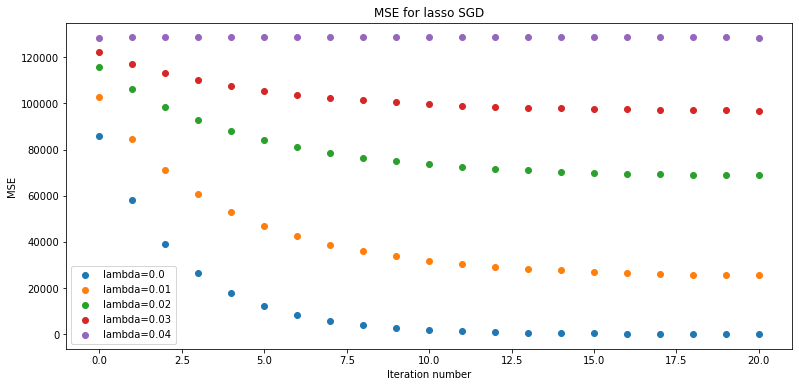

In [23]:
plt.figure(figsize=(13, 6))
for i in np.arange(0, 0.05, 0.01):
    _, _, _, errors6 = lasso_sgd(data_st, target, 20, lambda_=i, alpha=1e-1)
    plt.scatter(range(len(errors6)), errors6, label=f'lambda={i}')

plt.title('MSE for lasso SGD')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('MSE')
# plt.xlim([10, 82])
# plt.ylim([0, 500])
plt.show()

20 [194.57112519  93.84402494  90.15735872  79.04207966  80.21826088] 100.94407425966988
20 [145.45198278  44.92685715  40.48073575  30.73378349  29.46013782] 25557.90511460805
20 [9.63426262e+01 4.10426759e-02 3.24209449e-02 4.53607982e-02
 1.61873136e-02] 68780.95414295353
20 [ 4.72574121e+01  1.05618694e-02 -4.38058550e-04  3.99574753e-02
  1.28431245e-02] 96932.41419367761
20 [ 0.04704063  0.00572166 -0.00321651  0.03702685  0.013618  ] 128567.33849456118


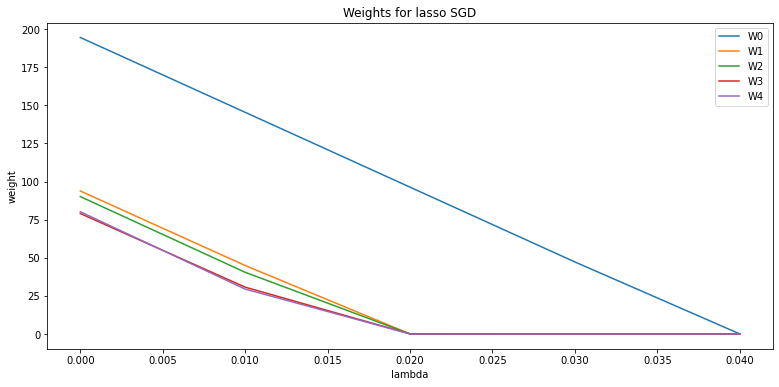

In [24]:
plt.figure(figsize=(13, 6))
weights = []
step = 0.01
max_step = 0.05
for i in np.arange(0, max_step, step):
    _, W6, _, _ = lasso_sgd(data_st, target, 20, lambda_=i, alpha=1e-1)
    weights.append(W6)
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(np.arange(0, weights.shape[1]*step, step), weights[:, i], label=f'W{i}')

plt.title('Weights for lasso SGD')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('weight')
# plt.xlim([10, 82])
# plt.ylim([0, 500])
plt.show()

*Как и при L2-регуляризации, L1-регуляризация сильнее штрафует модель SGD. На последнем графике видим, как все веса были занулены.*